In [1]:
import numpy as np

# Generar puntos aleatorios en el rectángulo [0, 8] × [0, 8]
k = 8
np.random.seed(42)  # Fijar la semilla para reproducibilidad
centers = np.random.uniform(0, 8, (k, 2))

def f(x, sigma=0.1):
    """
    Calcula la suma de gaussianas en 2 dimensiones con centros generados aleatoriamente.
    
    :param x: Vector 2D donde se evaluará la función, por ejemplo, [x1, x2]
    :param sigma: Valor del parámetro σ (sigma)
    :return: Valor de la función en el punto `x`
    """
    return -sum(np.exp(-0.5 * np.linalg.norm(np.array(x) - center)**2 / sigma) for center in centers)

# Crear una cuadrícula de puntos para evaluar la función
sigma = 1.0
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([[f([i, j], sigma) for i, j in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

In [2]:
def grad_f(x, sigma=0.1):
    """
    Calcula el gradiente de la suma de gaussianas en 2D.
    :param x: Vector 2D donde se evaluará la función, por ejemplo, [x1, x2]
    :param sigma: Valor del parámetro σ (sigma)
    :return: Gradiente como un vector [df/dx1, df/dx2]
    """
    grad = np.zeros(2)
    for center in centers:
        diff = np.array(x) - center
        exp_val = np.exp(-0.5 * np.linalg.norm(diff)**2 / sigma)
        grad += exp_val * diff / sigma
    return -grad

In [3]:
def hessian_f(x, sigma):
    """
    Calcula el hessiano de la suma de gaussianas en 2D.
    :param x: Vector 2D donde se evaluará la función, por ejemplo, [x1, x2]
    :param sigma: Valor del parámetro σ (sigma)
    :return: Hessiano como una matriz 2x2
    """
    hessian = np.zeros((2, 2))
    for center in centers:
        diff = np.array(x) - center
        exp_val = np.exp(-0.5 * np.linalg.norm(diff)**2 / sigma)
        hessian[0, 0] += exp_val * ((diff[0]**2 / sigma**2) - (1 / sigma))
        hessian[1, 1] += exp_val * ((diff[1]**2 / sigma**2) - (1 / sigma))
        hessian[0, 1] += exp_val * (diff[0] * diff[1] / sigma**2)
        hessian[1, 0] = hessian[0, 1]
    return -hessian

x_final: [3. 9.]


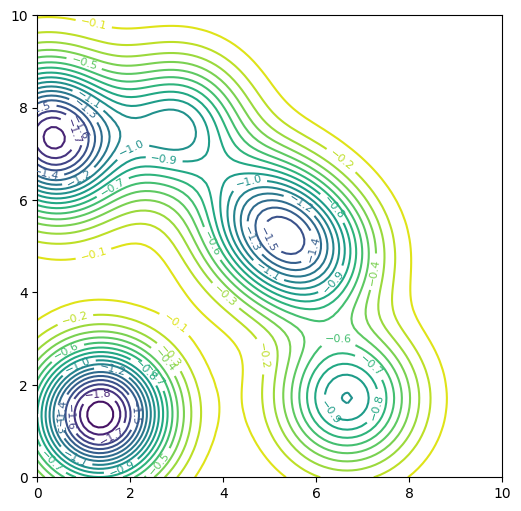

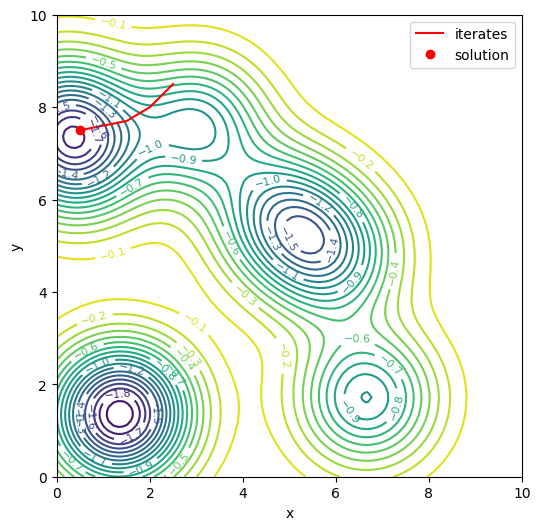

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from algorythms import descenso_aleatorio

# Graficar las líneas de contorno
plt.figure(figsize=(6, 6))
contour = plt.contour(X, Y, Z, 20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)


# Punto inicial
x0 = [3, 9]

x_final, x_hist, f_hist, err_hist, iterations, converged = descenso_aleatorio(f=f, df=grad_f, x0=x0, alpha=0.1, max_iter=1000, epsilon=1e-6)
print("x_final:", x_final)

# Extraer coordenadas x e y de x_hist para graficar
iterates_x = [coord[0] for coord in x_hist]
iterates_y = [coord[1] for coord in x_hist]

# Graficar las líneas de contorno
plt.figure(figsize=(6, 6))
contour = plt.contour(X, Y, Z, 20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Graficar la trayectoria de iteraciones
plt.plot(iterates_x, iterates_y, '-r', label='iterates')
plt.plot(iterates_x[-1], iterates_y[-1], 'or', label='solution')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.xlabel('x')
plt.ylabel('y')
plt.show()